In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [138]:
df = pd.read_csv("breast_cancer_data.csv")
# df2 = pd.read_excel("breast_cancer_data.xlsx")

In [139]:
print(df.shape)

(569, 31)


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [141]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Class                      0
dtype: int64

mean radius


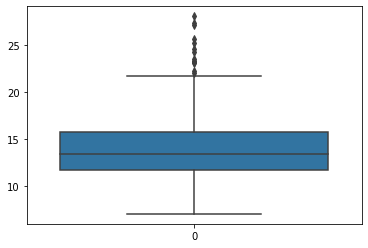

mean texture


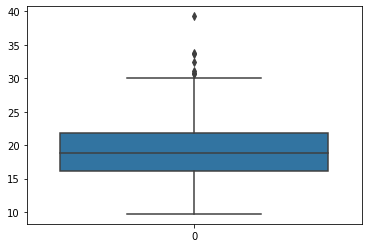

mean perimeter


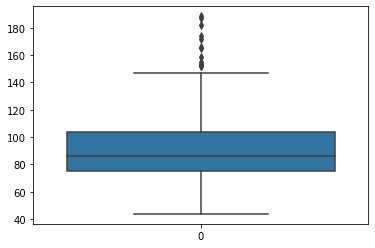

mean area


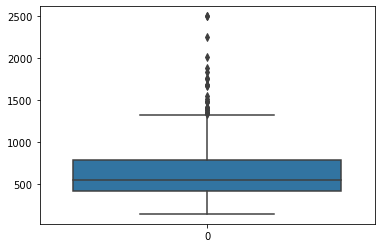

mean smoothness


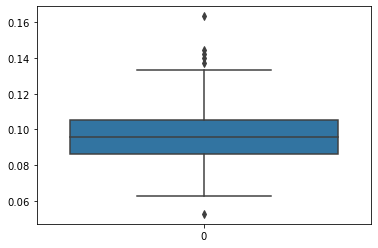

mean compactness


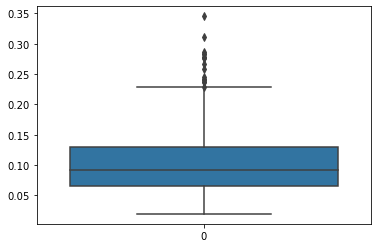

mean concavity


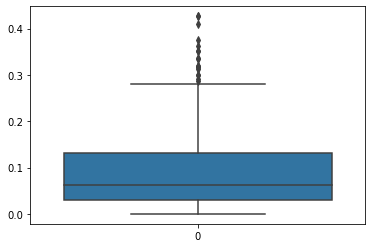

mean concave points


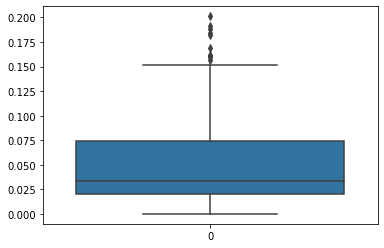

mean symmetry


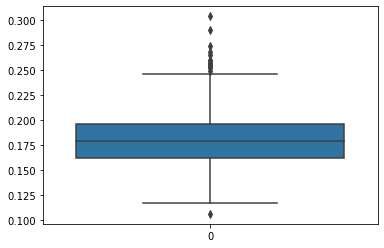

mean fractal dimension


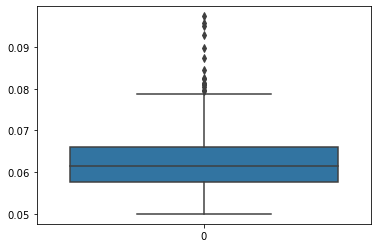

radius error


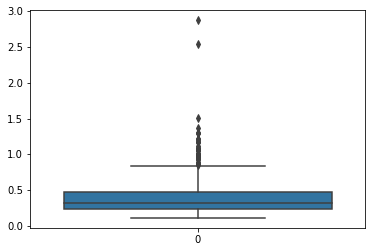

texture error


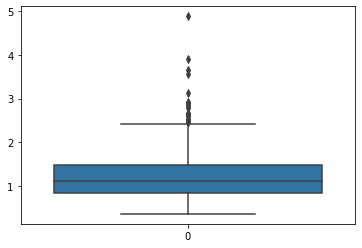

perimeter error


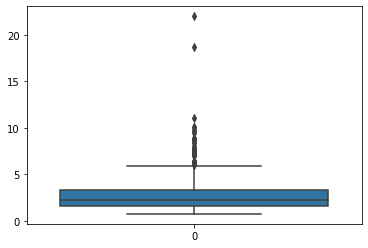

area error


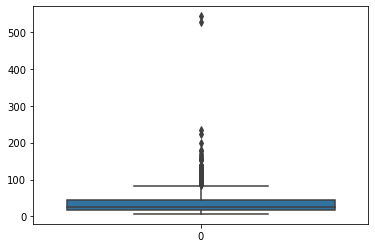

smoothness error


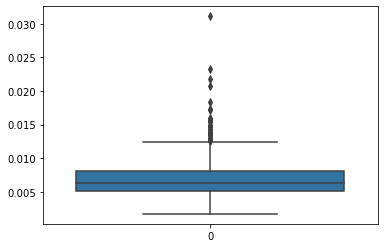

compactness error


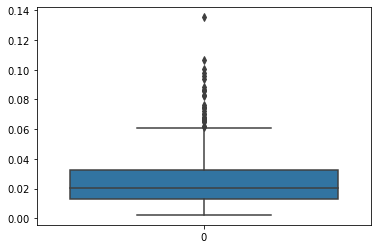

concavity error


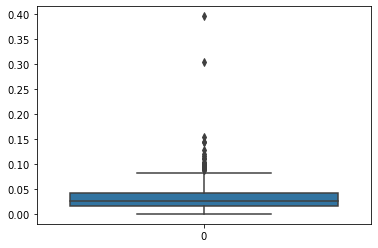

concave points error


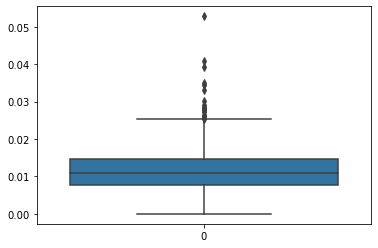

symmetry error


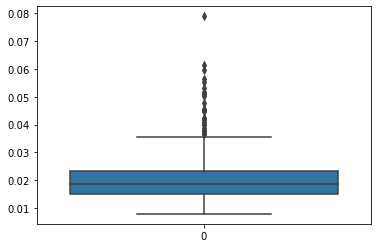

fractal dimension error


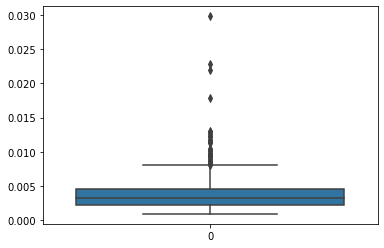

worst radius


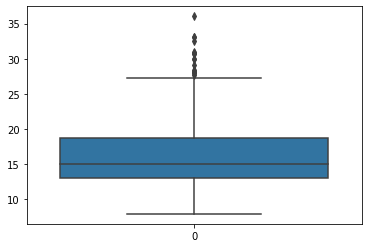

worst texture


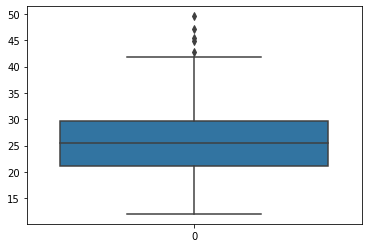

worst perimeter


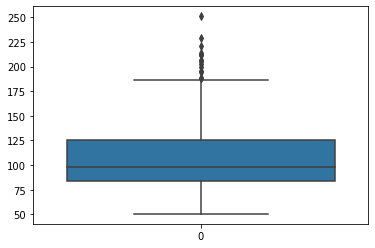

worst area


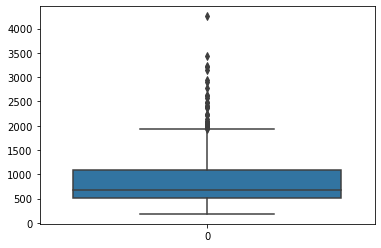

worst smoothness


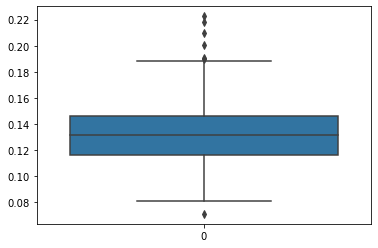

worst compactness


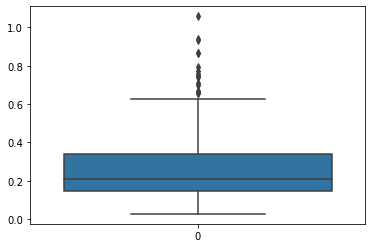

worst concavity


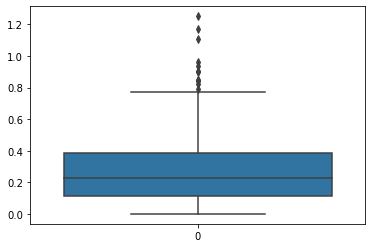

worst concave points


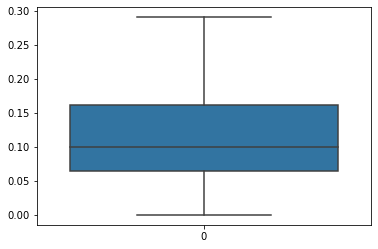

worst symmetry


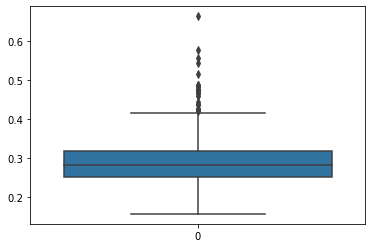

worst fractal dimension


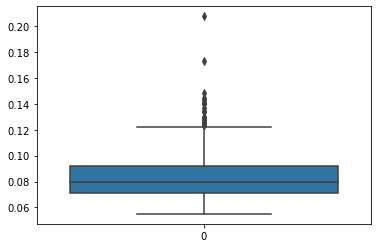

Class


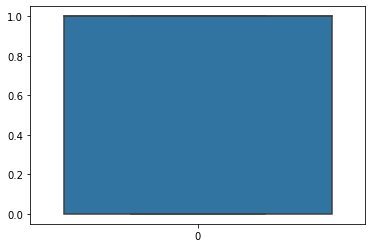

In [142]:
for column in df.columns:
    if df[column].dtype != object:
        print(column)
        sns.boxplot(data = df[column])
        plt.show()

In [143]:
def outliers(data,cols):
    for column in data.drop(cols,axis=1).columns:
        if data[column].dtype != object:
            Q1 = np.percentile(data[column],25)
            Q3 = np.percentile(data[column],75)
            IQR = Q3-Q1
            lower = Q1 -(IQR*1.5)
            upper = Q3+(IQR*1.5)
            data[column]=data[column].apply(lambda value : upper if value>upper else lower if value<lower else value)
    return data

In [144]:
df1 = outliers(df,['Class'])
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,...,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890,0
1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902,0
2,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758,0
3,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,...,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301,0
4,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678,0


mean radius


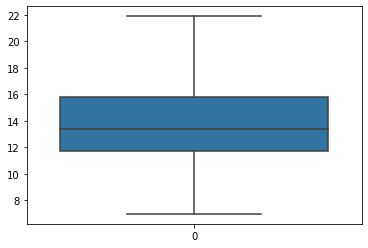

mean texture


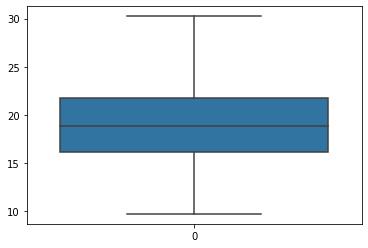

mean perimeter


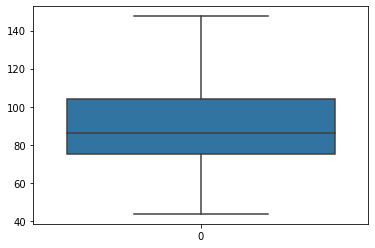

mean area


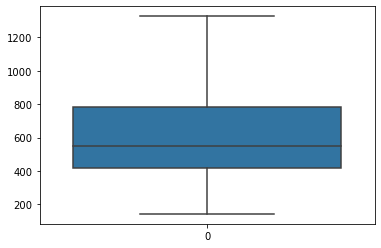

mean smoothness


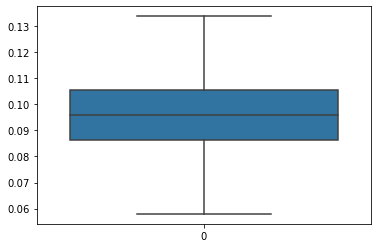

mean compactness


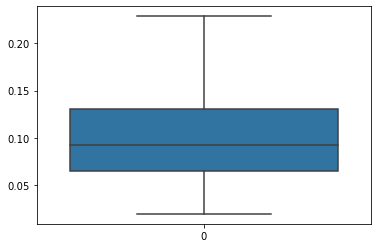

mean concavity


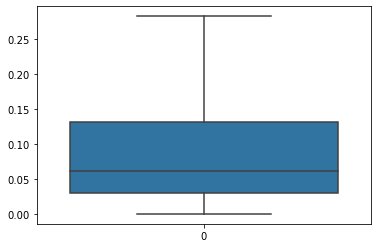

mean concave points


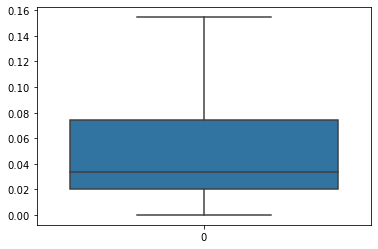

mean symmetry


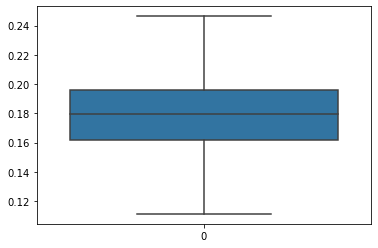

mean fractal dimension


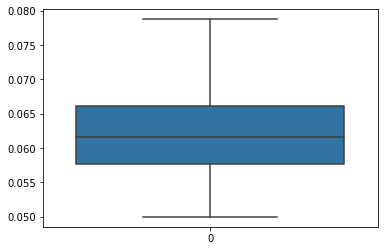

radius error


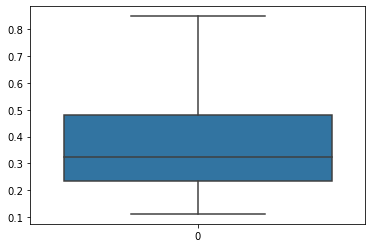

texture error


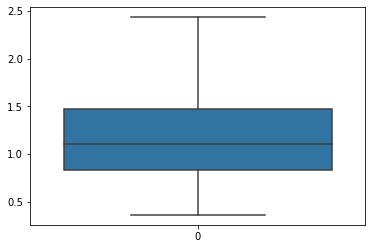

perimeter error


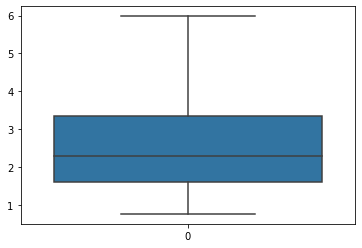

area error


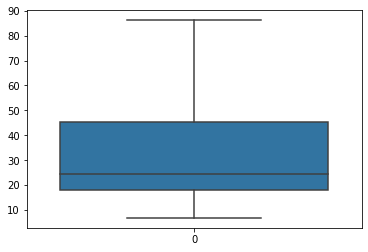

smoothness error


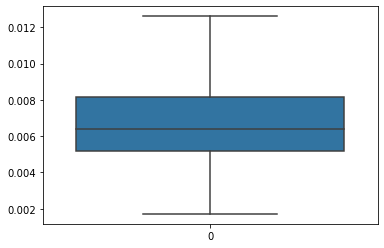

compactness error


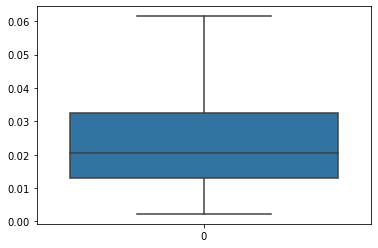

concavity error


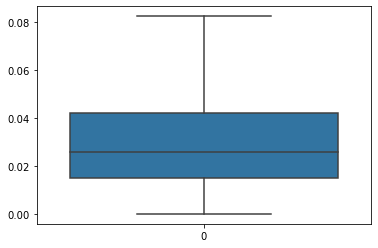

concave points error


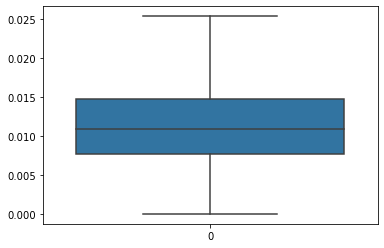

symmetry error


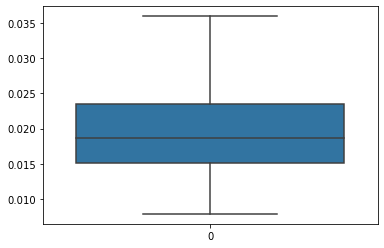

fractal dimension error


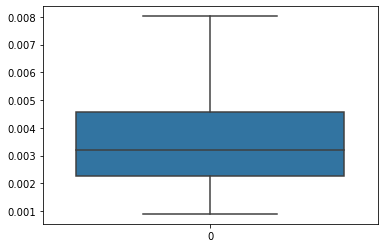

worst radius


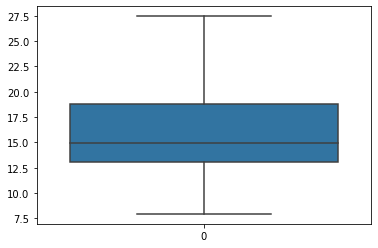

worst texture


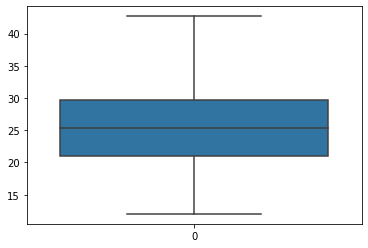

worst perimeter


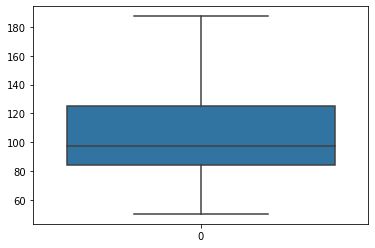

worst area


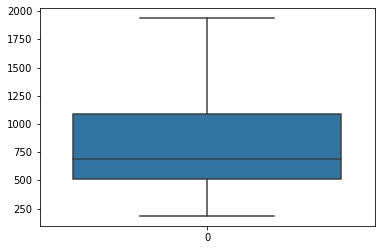

worst smoothness


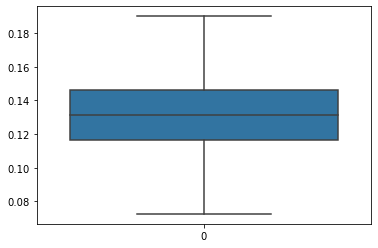

worst compactness


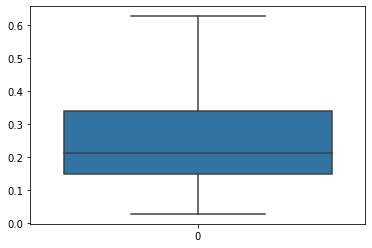

worst concavity


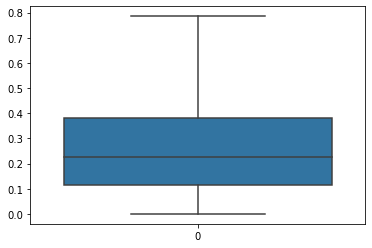

worst concave points


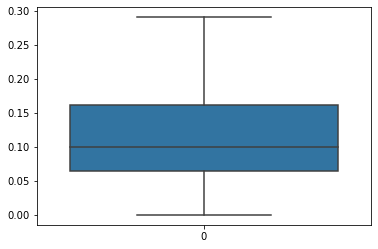

worst symmetry


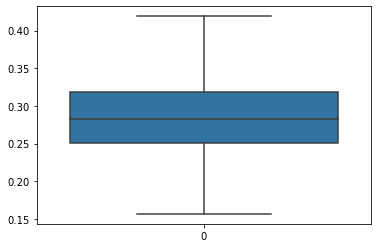

worst fractal dimension


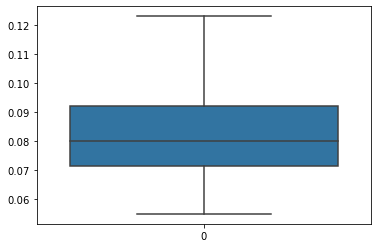

Class


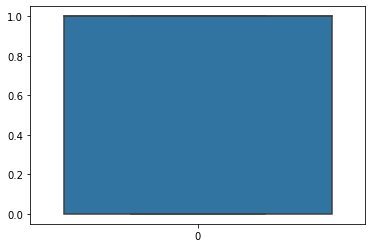

In [145]:
for column in df1.columns:
    if df1[column].dtype != object:
        print(column)
        sns.boxplot(data = df1[column])
        plt.show()

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

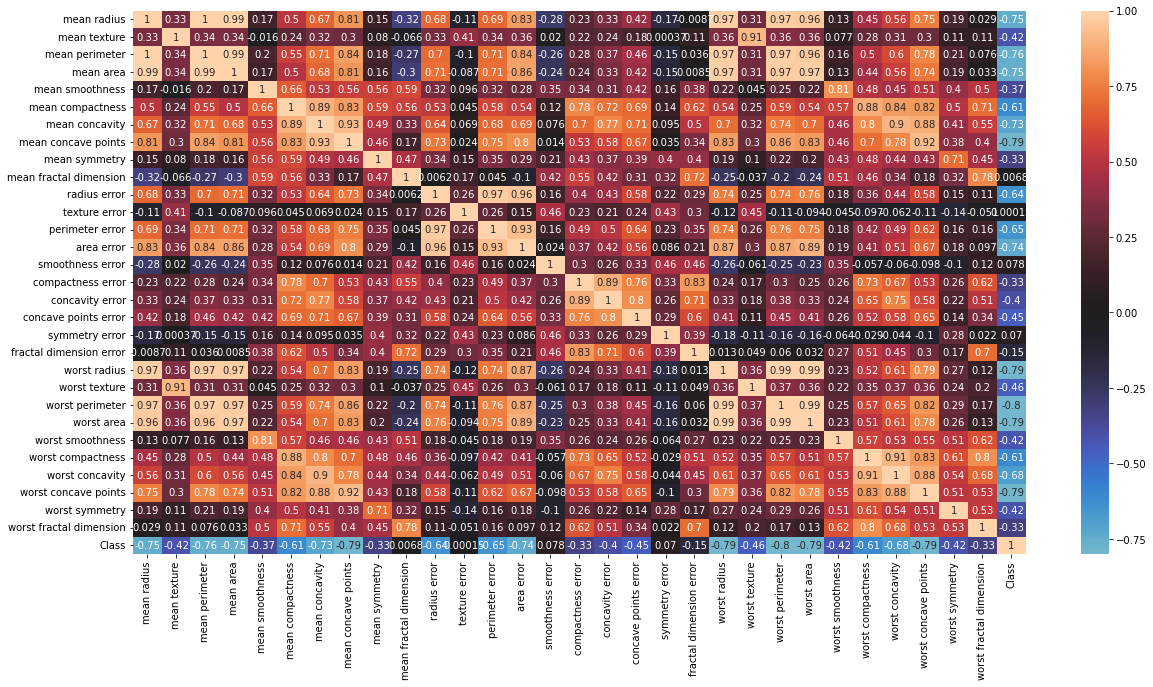

In [147]:
corr = df1.corr()
fig = plt.figure(figsize=(20,10))
ax = sns.heatmap(data = corr,center = 0, annot=True)
plt.show()

In [176]:
X = df1.drop(['Class','worst fractal dimension','compactness error','mean symmetry','mean smoothness','mean fractal dimension','texture error','smoothness error','symmetry error','fractal dimension error'],axis = 1)
Y = df1['Class']
Y.value_counts()

1    357
0    212
Name: Class, dtype: int64

In [203]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=101)

In [204]:
model = SVC()
model.fit(X_train,Y_train)

pred_test = model.predict(X_test)

print(accuracy_score(Y_test,pred_test))

pred_train = model.predict(X_train)
print(accuracy_score(Y_train,pred_train))


0.9239766081871345
0.9195979899497487


In [188]:
params = {'C': [10,100,230,500,800,1000,2000],
          'gamma':[500,300,100,1000,2000,50,100000]   
         }
grid = GridSearchCV(SVC(),params,cv = 5,verbose = 8)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END ...................C=10, gamma=500;, score=0.635 total time=   0.0s
[CV 2/5] END ...................C=10, gamma=500;, score=0.635 total time=   0.0s
[CV 3/5] END ...................C=10, gamma=500;, score=0.622 total time=   0.0s
[CV 4/5] END ...................C=10, gamma=500;, score=0.622 total time=   0.0s
[CV 5/5] END ...................C=10, gamma=500;, score=0.630 total time=   0.0s
[CV 1/5] END ...................C=10, gamma=300;, score=0.635 total time=   0.0s
[CV 2/5] END ...................C=10, gamma=300;, score=0.635 total time=   0.0s
[CV 3/5] END ...................C=10, gamma=300;, score=0.622 total time=   0.0s
[CV 4/5] END ...................C=10, gamma=300;, score=0.622 total time=   0.0s
[CV 5/5] END ...................C=10, gamma=300;, score=0.630 total time=   0.0s
[CV 1/5] END ...................C=10, gamma=100;, score=0.635 total time=   0.0s
[CV 2/5] END ...................C=10, gamma=100

[CV 2/5] END ...............C=230, gamma=100000;, score=0.635 total time=   0.0s
[CV 3/5] END ...............C=230, gamma=100000;, score=0.622 total time=   0.0s
[CV 4/5] END ...............C=230, gamma=100000;, score=0.622 total time=   0.0s
[CV 5/5] END ...............C=230, gamma=100000;, score=0.630 total time=   0.0s
[CV 1/5] END ..................C=500, gamma=500;, score=0.635 total time=   0.0s
[CV 2/5] END ..................C=500, gamma=500;, score=0.635 total time=   0.0s
[CV 3/5] END ..................C=500, gamma=500;, score=0.622 total time=   0.0s
[CV 4/5] END ..................C=500, gamma=500;, score=0.622 total time=   0.0s
[CV 5/5] END ..................C=500, gamma=500;, score=0.630 total time=   0.0s
[CV 1/5] END ..................C=500, gamma=300;, score=0.635 total time=   0.0s
[CV 2/5] END ..................C=500, gamma=300;, score=0.635 total time=   0.0s
[CV 3/5] END ..................C=500, gamma=300;, score=0.622 total time=   0.0s
[CV 4/5] END ...............

[CV 5/5] END ..................C=1000, gamma=50;, score=0.630 total time=   0.0s
[CV 1/5] END ..............C=1000, gamma=100000;, score=0.635 total time=   0.0s
[CV 2/5] END ..............C=1000, gamma=100000;, score=0.635 total time=   0.0s
[CV 3/5] END ..............C=1000, gamma=100000;, score=0.622 total time=   0.0s
[CV 4/5] END ..............C=1000, gamma=100000;, score=0.622 total time=   0.0s
[CV 5/5] END ..............C=1000, gamma=100000;, score=0.630 total time=   0.0s
[CV 1/5] END .................C=2000, gamma=500;, score=0.635 total time=   0.0s
[CV 2/5] END .................C=2000, gamma=500;, score=0.635 total time=   0.0s
[CV 3/5] END .................C=2000, gamma=500;, score=0.622 total time=   0.0s
[CV 4/5] END .................C=2000, gamma=500;, score=0.622 total time=   0.0s
[CV 5/5] END .................C=2000, gamma=500;, score=0.630 total time=   0.0s
[CV 1/5] END .................C=2000, gamma=300;, score=0.635 total time=   0.0s
[CV 2/5] END ...............

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 100, 230, 500, 800, 1000, 2000],
                         'gamma': [500, 300, 100, 1000, 2000, 50, 100000]},
             verbose=8)

In [190]:
grid.best_params_

{'C': 10, 'gamma': 500}